<a href="https://colab.research.google.com/github/ddodds42/cwmd_data_project/blob/master/Probability_of_war/Near_Miss_classification_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Notebook is an attempt to find a lower bound estimate for the probability of nuclear war.

Finding the lower bound is much more difficult than an upper bound. A lower bound estimate depends a past occurence of nuclear war under deterrance (the bombing of Japan was pre-deterrance), whereas estimating an upper-bound can be done in the absence of any nuclear war occuring.

## This Modelling uses a [historical datastet of 60 Nuclear Near Misses](https://github.com/ddodds42/cwmd_data_project/blob/master/GCRI_Modeling_Reports/A_model_for_the_probability_of_nuclear_war.pdf) from the Global Catastrophic Risk Institute.

It assumes that the more frequently we humans have made mistakes or incited close-calls with nuclear weapons / nuclear diplomacy, the higher the minimum probability of nuclear war must be. To extend Bertrand Russel's nuclear war tight-rope metaphor - an acrobat walking a tight-rope with high focus and humility is less likely to fall than an acrobat dancing on the tight-rope and flaunting for the camera. The more stunts, the more likely the fall.

## The code cell below is a classification of those 60 near-misses.
I built this dictionary while reading the near-miss dataset in GCRI's Probability Modelling Report, evaluating each incident for the presence of the following characteristics:

### 0 - Diplomacy erosion, threats
### 1 - Military buildups and exercises
### 2 - Nuclear weapon systems testing
### 3 - Conventional (non-nuclear) Military violence
### 4 - Weapon systems accidents / averted war incidents
### 5 - Intentional nuclear strikes

In [1]:
Escalation_Dimension = {
0:[0,1,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,40,41,43,47,49,55,57],
1:[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,34,35,36,37,38,40,43,45,46,47,49,51,54,55,56,58,59],
2:[0,1,2,3,4,6,9,11,12,13,14,15,16,17,18,19,21,22,23,24,25,27,29,30,31,32,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,53,55,58,59],
3:[0,1,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,21,22,24,29,30,31,32,37,40,47,49,55],
4:[3,13,19,24,29,30,31,32,34,42,43,44,45,46,48,49,50,51,52,53,54,55,56,58,59],
5:[0]
}

### This next dictionary excludes pre-deterrance (pre-1949) incidents. The odds of nuclear war when only the US had nuclear monopoly were likely totally different than when the Soviets and others acquired nuclear weapons.

In [2]:
Escalation_Dimension_Post_Deterrence = {
0:[1,3,4,5,6,7,8,9,10,12,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,40,41,43,47,49,55,57],
1:[1,2,3,4,5,6,7,8,9,10,12,14,15,16,17,18,19,21,22,23,24,26,27,28,29,30,31,32,34,35,36,37,38,40,43,45,46,47,49,51,54,55,56,58,59],
2:[1,2,3,4,6,9,12,13,14,15,16,17,18,19,21,22,23,24,25,27,29,30,31,32,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,53,55,58,59],
3:[1,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,21,22,24,29,30,31,32,37,40,47,49,55],
4:[13,19,24,29,30,31,32,34,42,43,44,45,46,48,49,50,51,52,53,54,55,56,58,59],
5:[]
}

In [3]:
print('Since WWII:')
print(len(Escalation_Dimension[0]), ' diplomacy breakdowns')
print(len(Escalation_Dimension[1]), ' military buildups / exercise incidents')
print(len(Escalation_Dimension[2]), ' incidents coinciding weapon systems testing')
print(len(Escalation_Dimension[3]), ' incidents with conventional military contact')
print(len(Escalation_Dimension[4]), ' weapon systems accidents / averted war incidents')
print(len(Escalation_Dimension[5]), ' intentional nuclear strikes')


Since WWII:
43  diplomacy breakdowns
48  military buildups / exercise incidents
47  incidents coinciding weapon systems testing
30  incidents with conventional military contact
25  weapon systems accidents / averted war incidents
1  intentional nuclear strikes


### Counts for each type of incident. The counts in the cell below will be used to estimate how many "Level 5" Nuclear Launches we might have luckily averted since 1949.


In [4]:
print('Since the deterrance paradigm began:')
print(len(Escalation_Dimension_Post_Deterrence[0]), ' diplomacy breakdowns')
print(len(Escalation_Dimension_Post_Deterrence[1]), ' military buildups / exercise incidents')
print(len(Escalation_Dimension_Post_Deterrence[2]), ' incidents coinciding weapon systems testing')
print(len(Escalation_Dimension_Post_Deterrence[3]), ' incidents with conventional military contact')
print(len(Escalation_Dimension_Post_Deterrence[4]), ' weapon systems accidents / averted war incidents')
print(len(Escalation_Dimension_Post_Deterrence[5]), ' intentional nuclear strikes')

Since the deterrance paradigm began:
40  diplomacy breakdowns
45  military buildups / exercise incidents
45  incidents coinciding weapon systems testing
29  incidents with conventional military contact
24  weapon systems accidents / averted war incidents
0  intentional nuclear strikes


In [5]:
incident_levels = [i for i in Escalation_Dimension_Post_Deterrence.keys()]
print(incident_levels)

[0, 1, 2, 3, 4, 5]


In [6]:
count = [len(Escalation_Dimension_Post_Deterrence[i]) for i in incident_levels]
print(count)

[40, 45, 45, 29, 24, 0]


In [7]:
import pandas as pd

In [8]:
df_dict = {'incident_level': incident_levels, 'count':count}

df = pd.DataFrame(data=df_dict)
df

,incident_level,count
0,0,40
1,1,45
2,2,45
3,3,29
4,4,24
5,5,0


In [9]:
import matplotlib.pyplot as plt

In [10]:
df_nolaunch = df.iloc[:5]
df_nolaunch

,incident_level,count
0,0,40
1,1,45
2,2,45
3,3,29
4,4,24


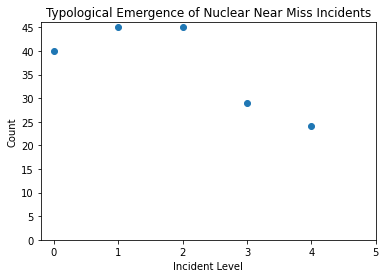

In [11]:
plt.scatter(df_nolaunch['incident_level'], df_nolaunch['count'])
plt.title('Typological Emergence of Nuclear Near Miss Incidents')
plt.xlabel('Incident Level')
plt.xticks(df['incident_level'])
plt.ylabel('Count')
plt.yticks(range(0,50,5))
plt.show()

### Let's try some Regressions to get an idea for how many 5's we might expect.

First one I tried assumes a trend in the exponential / logarithmic decay of the increments between counts of each incident level.

In [12]:
# LOGARITHMIC DECAY

#  2^y = 30
#  y = log2(30)

In [13]:
import math

# math.e
# math.log(x, base)

In [14]:
for i in incident_levels[:4]:
  y = math.log(count[i+1],count[i])
  print(f'{i} to {i+1}: ', y)

0 to 1:  1.0319292178347081
1 to 2:  1.0
2 to 3:  0.884579559925641
3 to 4:  0.9438000077233224


### These exponenetial values separate each increment count from the previous level.

Let's use a line of best fit to ascertain the exponent separating level 4 and level 5.

In [15]:
increment = [i+0.5 for i in range(4)]
exponent = [math.log(count[i+1],count[i]) for i in incident_levels[:4]]
df_increment_dict = {'increment': increment, 'exponent':exponent}
print(df_increment_dict)

{'increment': [0.5, 1.5, 2.5, 3.5], 'exponent': [1.0319292178347081, 1.0, 0.884579559925641, 0.9438000077233224]}


In [16]:
df_increment = pd.DataFrame(data=df_increment_dict)
df_increment

,increment,exponent
0,0.5,1.031929
1,1.5,1.000000
2,2.5,0.884580
3,3.5,0.943800


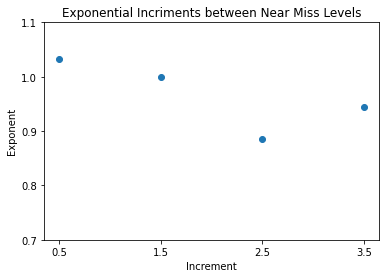

In [17]:
plt.scatter(df_increment['increment'], df_increment['exponent'])
plt.title('Exponential Incriments between Near Miss Levels')
plt.xlabel('Increment')
plt.xticks(df_increment['increment'])
plt.ylabel('Exponent')
plt.yticks([0.7,0.8,0.9, 1,1.1])
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
features = ['increment']
target = 'exponent'

X_train = df_increment[features]
y_train = df_increment[target]

model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

[-0.03798081]
1.0410388104526211


In [21]:
launch_exp = model.predict([[4.5]])
print(launch_exp)

[0.87012518]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [22]:
import seaborn as sb

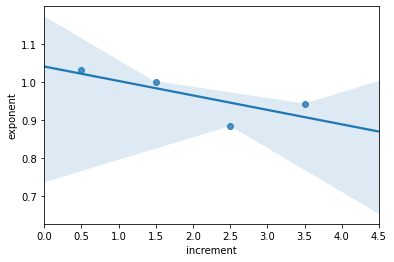

In [23]:
plt.xlim(0,4.5)
sb.regplot(x=df_increment['increment'], y=df_increment['exponent'], truncate=False);

In [24]:
increment_pred = increment
increment_pred.append(4.5)

exponent_pred = exponent
exponent_pred.append(launch_exp[0])

df_increment_log_dict = {'increment_pred':increment_pred, 'exponent_pred':exponent_pred}

# print(increment)
print(df_increment_log_dict)

{'increment_pred': [0.5, 1.5, 2.5, 3.5, 4.5], 'exponent_pred': [1.0319292178347081, 1.0, 0.884579559925641, 0.9438000077233224, 0.8701251787687888]}


In [25]:
df_increment_log = pd.DataFrame(data=df_increment_log_dict)
df_increment_log

,increment_pred,exponent_pred
0,0.5,1.031929
1,1.5,1.000000
2,2.5,0.884580
3,3.5,0.943800
4,4.5,0.870125


In [26]:
lambda_min_log = count[4] ** exponent_pred[-1]
print(lambda_min_log)

15.883878392550955


In [27]:
df_log_pred_dict = df_dict
df_log_pred_dict['count'][-1] = lambda_min_log
print(df_log_pred_dict)

{'incident_level': [0, 1, 2, 3, 4, 5], 'count': [40, 45, 45, 29, 24, 15.883878392550955]}


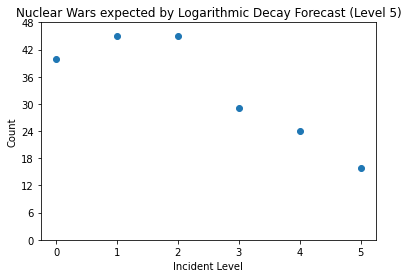

In [28]:
df_log_pred = pd.DataFrame(data=df_log_pred_dict)

plt.scatter(df_log_pred['incident_level'], df_log_pred['count'])
plt.title('Nuclear Wars expected by Logarithmic Decay Forecast (Level 5)')
plt.xlabel('Incident Level')
plt.xticks(df_log_pred['incident_level'])
plt.ylabel('Count')
plt.yticks(range(0,50,6))
plt.show()

## LOGARITHMS REGRESSED: THERE SHOULD HAVE BEEN ~16 NUCLEAR LAUNCHES SINCE 1949

# Now I'll try a Regression assumes a proportional trend in the decay of the increments between counts of each incident level.

In [29]:
# MULTIPLICATIVE DECAY (RATHER THAN LOGARITHMIC)

In [30]:
margin = [(count[i+1] / count[i]) for i in incident_levels[:4]]
df_mult_decay_dict = {'increment': increment[:-1], 'margin':margin}
print(df_mult_decay_dict)

{'increment': [0.5, 1.5, 2.5, 3.5], 'margin': [1.125, 1.0, 0.6444444444444445, 0.8275862068965517]}


In [31]:
df_mult_decay = pd.DataFrame(data=df_mult_decay_dict)
df_mult_decay

,increment,margin
0,0.5,1.125000
1,1.5,1.000000
2,2.5,0.644444
3,3.5,0.827586


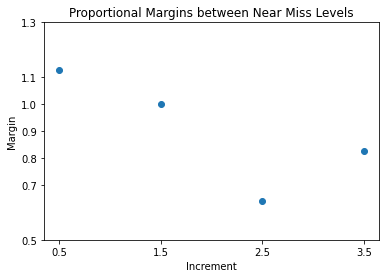

In [32]:
plt.scatter(df_mult_decay['increment'], df_mult_decay['margin'])
plt.title('Proportional Margins between Near Miss Levels')
plt.xlabel('Increment')
plt.xticks(df_mult_decay['increment'])
plt.ylabel('Margin')
plt.yticks([0.5,0.7,0.8,0.9, 1,1.1, 1.3])
plt.show()

In [33]:
model_m = LinearRegression()

In [34]:
target_m = 'margin'

X_train_m = df_mult_decay[features]
y_train_m = df_mult_decay[target_m]

model_m.fit(X_train_m, y_train_m)

print(model_m.coef_)
print(model_m.intercept_)

[-0.12477969]
1.148817049808429


In [35]:
launch_marg = model_m.predict([[4.5]])
print(launch_marg)

[0.58730843]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


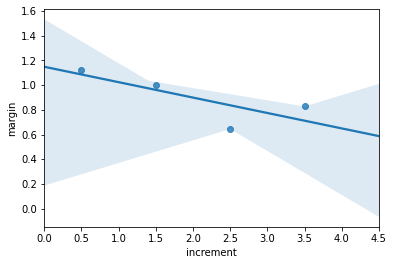

In [36]:
plt.xlim(0,4.5)
sb.regplot(x=df_mult_decay['increment'], y=df_mult_decay['margin'], truncate=False);

In [37]:
margin_pred = margin
margin_pred.append(launch_marg[0])

df_mult_decay_pred_dict = {'increment_pred':increment_pred, 'margin_pred':margin_pred}

# print(increment)
print(df_mult_decay_pred_dict)

{'increment_pred': [0.5, 1.5, 2.5, 3.5, 4.5], 'margin_pred': [1.125, 1.0, 0.6444444444444445, 0.8275862068965517, 0.5873084291187739]}


In [38]:
df_mult_decay_pred = pd.DataFrame(data=df_mult_decay_pred_dict)
df_mult_decay_pred

,increment_pred,margin_pred
0,0.5,1.125000
1,1.5,1.000000
2,2.5,0.644444
3,3.5,0.827586
4,4.5,0.587308


In [39]:
lambda_min_mult = count[4] * margin_pred[-1]
print(lambda_min_mult)

14.095402298850573


In [40]:
df_prop_pred_dict = df_dict
df_prop_pred_dict['count'][-1] = lambda_min_mult
print(df_prop_pred_dict)

{'incident_level': [0, 1, 2, 3, 4, 5], 'count': [40, 45, 45, 29, 24, 14.095402298850573]}


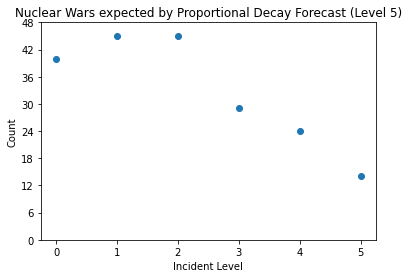

In [41]:
df_prop_pred = pd.DataFrame(data=df_prop_pred_dict)

plt.scatter(df_prop_pred['incident_level'], df_prop_pred['count'])
plt.title('Nuclear Wars expected by Proportional Decay Forecast (Level 5)')
plt.xlabel('Incident Level')
plt.xticks(df_prop_pred['incident_level'])
plt.ylabel('Count')
plt.yticks(range(0,50,6))
plt.show()

## PROPORTIONS REGRESSED: THERE SHOULD HAVE BEEN ~14 NUCLEAR LAUNCHES SINCE 1949

# Last I'll try a regular Linear Regression between the counts at each incident level.

In [42]:
# LINEAR REGRESSION DECAY

In [43]:
df_nolaunch

,incident_level,count
0,0,40
1,1,45
2,2,45
3,3,29
4,4,24


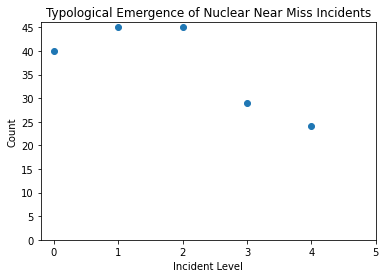

In [44]:
plt.scatter(df_nolaunch['incident_level'], df_nolaunch['count'])
plt.title('Typological Emergence of Nuclear Near Miss Incidents')
plt.xlabel('Incident Level')
plt.xticks(df['incident_level'])
plt.ylabel('Count')
plt.yticks(range(0,50,5))
plt.show()

In [45]:
model_lin = LinearRegression()

In [46]:
features_lin = ['incident_level']
target_lin = 'count'

X_train_lin = df_nolaunch[features_lin]
y_train_lin = df_nolaunch[target_lin]

model_lin.fit(X_train_lin, y_train_lin)

print(model_lin.coef_)
print(model_lin.intercept_)

[-4.8]
46.2


In [47]:
launch_lin = model_lin.predict([[5]])
print(launch_lin)

[22.2]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


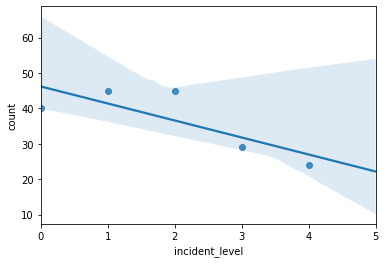

In [48]:
plt.xlim(0,5)
sb.regplot(x=df_nolaunch['incident_level'], y=df_nolaunch['count'], truncate=False);

# LINEAR REGRESSION: THERE SHOULD HAVE BEEN ~22 NUCLEAR LAUNCHES SINCE 1949

In [49]:
# we would have expected N number of nuclear launches (level 5) since 1949, so
# what are the odds that we instead had 0?

### These numbers seem quite high, and yeild a higher odds of nuclear war than my previously acquired 4.19% upper-bound, tabulated using a p-value of 95%.

A thought occured though. Finding yourself having to make the decision to trigger a nuclear war, as a head of state might occasionally, is most certainly a suicidal decision, for yourself and many you love. So lets look at similar situations in the human condition that have yeilded usable statistics over time. Namely, ceasefire failures, hostage negotiations, and suicidal terror attacks. The following percentage values can be multiplied to the count of level 4 incidents (nuclear weapon systems mistakes /  averted launches) to attain an number of level 5 incidents (nuclear launches) we might have expected since 1949.

In [50]:
# ceasefire breakdowns:

'''
from The Logic of Ceasefires in Civil War; Govinda Clayton, Valerie Stitcher

 At the twenty-five fatality level, thirty days after a ceasefire coming into
 effect 96 percent of definitive agreements remain active, about 92 percent of 
 preliminary agreements, and only 85 percent of Cessation of hostilities. Within
three months, the gap has significantly widened, with our model predicting 
only 48 percent of Cessation of Hostilities remaining in effect, compared to 
70 percent of preliminary and 80 percent of definitive agreements. By the end 
of the year, only 21 percent of all of the cessation of hostilities agreements 
held, around 49 percent of preliminary agreements remained in effect, while 
more than 65 percent of definitive agreements had prevented a return to 
violence. Unsurprisingly we see far greater failure rates at the one fatality 
threshold. After only three months, almost 70 percent of Cessation of hostility 
agreements, 50 percent of preliminary, and 30 percent of definitive agreements 
have terminated.
'''

'''
https://academic.oup.com/isq/advance-article/doi/10.1093/isq/sqab026/6277949
'''

'''
https://github.com/ddodds42/cwmd_data_project/blob/master/Probability_of_war/Logic%20of%20Ceasefires%20in%20Civil%20War.pdf
'''

'\nhttps://github.com/ddodds42/cwmd_data_project/blob/master/Probability_of_war/Logic%20of%20Ceasefires%20in%20Civil%20War.pdf\n'

In [51]:
'''
Hostage negotiation is estimated to be unsuccessful in 18% of the over 10,000 
estimated hostage-taking incidents annually in the United States 

Crisis (hostage) negotiation training. Criminal Justice and Behavior
(Van Hasselt et al., 2006).
Van Hasselt, V. B., Baker, M. T., Romano, S. J.,
Schlessinger, K. M., Zucker, M., Dragone, R., et al
'''

'''
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2695358/
'''

'\nhttps://www.ncbi.nlm.nih.gov/pmc/articles/PMC2695358/\n'

In [52]:
# percentage of suicide bombings

'''
[Suicide attacks]  constituted only 4% of all terrorist attacks around the 
world over one period (between 1981 and 2006)...
'''

'''
https://en.wikipedia.org/wiki/Suicide_attack
'''

'\nhttps://en.wikipedia.org/wiki/Suicide_attack\n'

# 4% is the absolute rosiest estimate for humans butchering high stakes decisions, such as ceasefires and suicide attacks (where these figures derive).

# To be generous with the lower bound odds, I will also assume that a nuclear launch is not only a suicide attack, but also hostage situation, in which almost all of the significant people & places an initiating president knows and loves are in ransom to a launch. We know that 18% of hostage situations fail. Assuming a nuclear launch is both suicide attack (4% of all terrorist attacks) and hostage situation (which fail 18% of the time), then the most generous consideration of deterrance failing in a near-launch situation is 0.04 x 0.18 = 

# THUSFAR, WITH 24 LEVEL 4 INCIDENTS (nuclear weapons systems errors / hightened alerts), WE SHOULD HAVE EXPECTED 4% OF THEM TO BREAKDOWN INTO NUCLEAR DEPLOYMENT, OR 0.96 NUCLEAR WARS SINCE 1949.

In [58]:
pct_attacks_suicidal = 0.04
pct_failed_hostage_situations = 0.18
pct_est_failure_nuclear_near_launches = pct_attacks_suicidal * pct_failed_hostage_situations
print(f"{pct_est_failure_nuclear_near_launches * 100}% of near launch events estimated to fail and lead to launch.")

0.72% of near launch events estimated to fail and lead to launch.


In [60]:
int_level4_incidents = 24
min_expected_launches = int_level4_incidents * pct_est_failure_nuclear_near_launches
print(f"With {int_level4_incidents} level 4 incidences, we should have expected {min_expected_launches} nuclear launches since 1949.")

With 24 level 4 incidences, we should have expected 0.1728 nuclear launches since 1949.


In [61]:
years_since_deterrance = 71.58

lambda_lower_bound = min_expected_launches / years_since_deterrance
print(lambda_lower_bound)

0.0024140821458507964


### A Lambda value of 0.0024 means we could have expected 0.0024 nuclear wars on average since 1949.

In [54]:
import math

In [62]:
yearly_odds = 1 - math.e ** (-lambda_lower_bound*1)
yearly_odds

0.002411170592927947

# MINIMUM 0.24112% chance of nuclear war in the next year

And for those curious... what are the odds that we've made it since 1949 without a nuclear war?

In [65]:
how_lucky_weve_been = math.e ** (-lambda_lower_bound*years_since_deterrance)
print('%.6f' %how_lucky_weve_been)

0.841306


In [57]:
# Find arithmetic, geometric, and harmonic means between 1.3322% and 4.19%